## Dataset Information:

**Title:** Bank Marketing

**Sources:** Created by Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012

**Past Usage:** The full dataset was described and analyzed in:

S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

**Relevant Information:**

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact with the same client was required to determine if the product (bank term deposit) would be subscribed or not.

There are two datasets:
1. `bank-full.csv` with all examples, ordered by date (from May 2008 to November 2010).
2. `bank.csv` with 10% of the examples (4521), randomly selected from `bank-full.csv`. The smaller dataset is provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe to a term deposit (variable y).

**Number of Instances:** 45211 for `bank-full.csv` (4521 for `bank.csv`)

**Number of Attributes:** 16 + output attribute

**Attribute Information:**

For more information, read [Moro et al., 2011].

Input variables:
1. age (numeric)
2. job: type of job (categorical)
3. marital: marital status (categorical)
4. education: education level (categorical)
5. default: has credit in default? (binary)
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (binary)
8. loan: has personal loan? (binary)
9. contact: contact communication type (categorical)
10. day: last contact day of the month (numeric)
11. month: last contact month of the year (categorical)
12. duration: last contact duration, in seconds (numeric)
13. campaign: number of contacts performed during this campaign and for this client (numeric)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical)


Output variable (desired target):

17. y: has the client subscribed to a term deposit? (binary)

**Missing Attribute Values:** None


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score

## First let's start with some EDA

In [51]:
df = pd.read_csv('bank-full.csv',delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [52]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [53]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [54]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [56]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [57]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## this data doesn't have null values :)

In [58]:
df.duplicated().sum()

0

# we will be removing these 2 column as they make highly affects the output target (e.g., if duration=0 then y='no').

In [59]:
df.drop(columns = ['duration','poutcome'], inplace=True) 
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,no


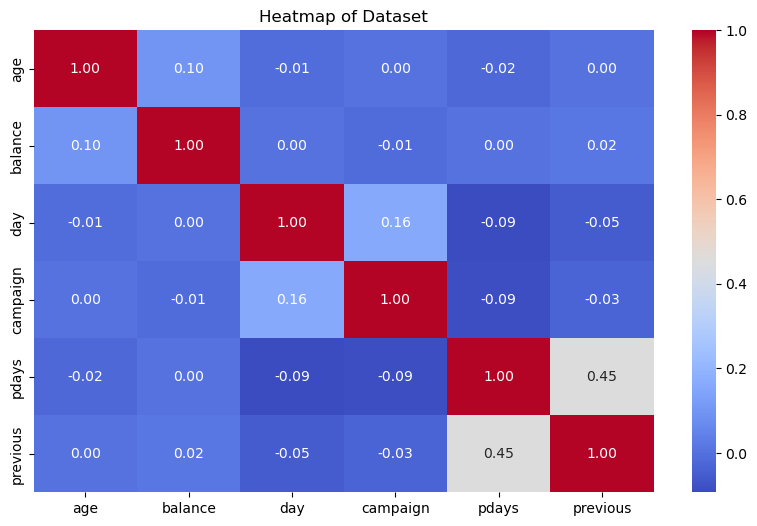

In [60]:
import seaborn as sns
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Dataset')
plt.show()

# we can't see a big relation between numeric variables with each other

In [61]:
df.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

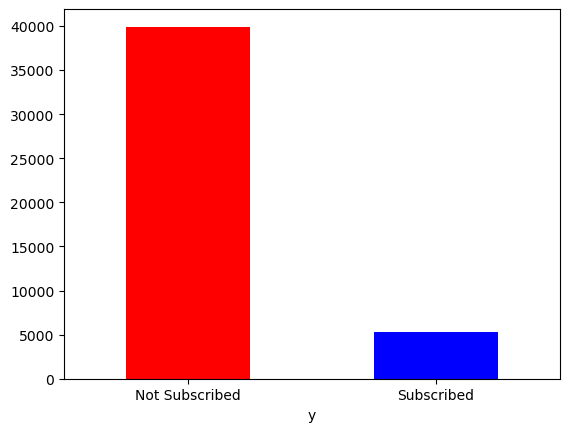

In [62]:
target_count = df.y.value_counts().plot(kind="bar",color=["red","blue"])
target_count.set_xticklabels(["Not Subscribed","Subscribed"], rotation = 0);

## From the graph above we can notice that we have class imbalance this can lead to worsen in the predictive model we will fix this by doing `SMOTE` method in the section of prediction 

# Now let's start with Encode categorical variables.

> let's begin with target column

In [66]:
#data_test['Disease'] = encoder.fit_transform(data_test['Disease'])
encoder = LabelEncoder()
df['y'] = encoder.fit_transform(df['y'])
df['month'] = encoder.fit_transform(df['month'])
df['contact'] = encoder.fit_transform(df['contact'])
df['housing'] = encoder.fit_transform(df['housing'])
df['loan'] = encoder.fit_transform(df['loan'])
df['default'] = encoder.fit_transform(df['default'])
df['marital'] = encoder.fit_transform(df['marital'])
df['education'] = encoder.fit_transform(df['education'])

df_encoded = pd.get_dummies(df, columns=['job'], prefix='job')
df_concatenated = pd.concat([df, df_encoded], axis=1)
df_concatenated = df_concatenated.drop('job',axis = 'columns')
df_concatenated = df_concatenated.loc[:,~df_concatenated.columns.duplicated()].copy()
df_concatenated.head().T

,0,1,2,3,4
age,58,44,33,47,33
marital,1,2,1,1,2
education,2,1,1,3,3
default,0,0,0,0,0
balance,2143,29,2,1506,1
housing,1,1,1,1,0
loan,0,0,1,0,0
contact,2,2,2,2,2
day,5,5,5,5,5
month,8,8,8,8,8


## Let's Now try to do some `Feature Scaling` for Improvement in our model
> for this we choose `Standardization`

In [68]:
from sklearn.preprocessing import StandardScaler

X = df_concatenated.drop(columns = ['y'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,1.606965,-0.275762,1.036362,-0.13549,0.256419,0.893915,-0.436803,1.514306,-1.298476,0.823773,...,-0.184415,-0.16793,1.944270,-0.2296,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,-0.080069
1,0.288529,1.368372,-0.300556,-0.13549,-0.437895,0.893915,-0.436803,1.514306,-1.298476,0.823773,...,-0.184415,-0.16793,-0.514332,-0.2296,-0.190234,-0.318082,-0.145557,2.225121,-0.172266,-0.080069
2,-0.747384,-0.275762,-0.300556,-0.13549,-0.446762,0.893915,2.289359,1.514306,-1.298476,0.823773,...,5.422561,-0.16793,-0.514332,-0.2296,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,-0.080069
3,0.571051,-0.275762,2.373280,-0.13549,0.047205,0.893915,-0.436803,1.514306,-1.298476,0.823773,...,-0.184415,-0.16793,-0.514332,-0.2296,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,-0.080069
4,-0.747384,1.368372,2.373280,-0.13549,-0.447091,-1.118674,-0.436803,1.514306,-1.298476,0.823773,...,-0.184415,-0.16793,-0.514332,-0.2296,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,12.489301


### Fixing the Imbalance problem 

In [70]:
x = X_scaled_df
y = df_concatenated['y']

In [71]:
y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [72]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)
y_sm.value_counts()

y
0    39922
1    39922
Name: count, dtype: int64

# Lastly let's end with Model deployment

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state = 15,stratify = y_sm)

In [74]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()  
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    scores_df = pd.DataFrame(model_scores, index=['Accuracy'])
    
    return scores_df

In [75]:
model_scores=fit_and_score(models=models,
                          X_train=x_train,
                          X_test=x_test,
                          y_train=y_train,
                          y_test=y_test)
print(model_scores)

          Logistic Regression       KNN  Random Forest  Naive Bayes
Accuracy             0.671489  0.855407       0.936502      0.65051


## Best model accuracy is Random Forest with accuracy 93.5%

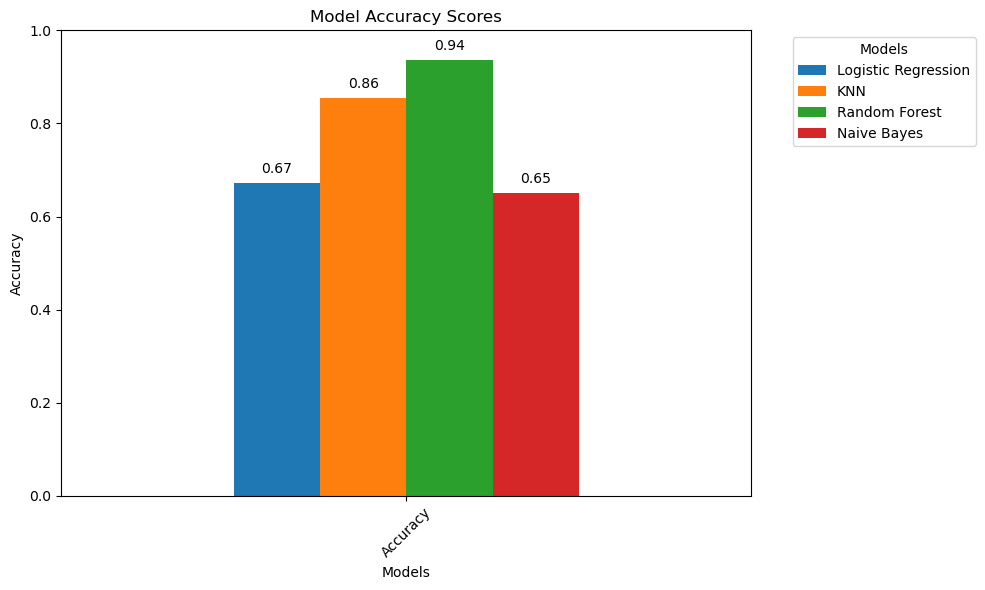

In [76]:
import matplotlib.pyplot as plt

def plot_model_scores(scores_df):
    plt.figure(figsize=(10, 6))
    ax = scores_df.plot(kind='bar', ax=plt.gca())
    
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')
    
    plt.title('Model Accuracy Scores')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

plot_model_scores(model_scores)


In [77]:
from sklearn.metrics import classification_report


for name, model in models.items():
    print(f"Evaluation for {name}:")
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))
    print("="*50)  # Separating each evaluation for better readability


Evaluation for Logistic Regression:
              precision    recall  f1-score   support

           0       0.69      0.63      0.66      7985
           1       0.66      0.71      0.68      7984

    accuracy                           0.67     15969
   macro avg       0.67      0.67      0.67     15969
weighted avg       0.67      0.67      0.67     15969

Evaluation for KNN:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      7985
           1       0.79      0.96      0.87      7984

    accuracy                           0.86     15969
   macro avg       0.87      0.86      0.85     15969
weighted avg       0.87      0.86      0.85     15969

Evaluation for Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7985
           1       0.95      0.93      0.94      7984

    accuracy                           0.94     15969
   macro avg       0.94      0.94      0.9

## Let's look at feature importance

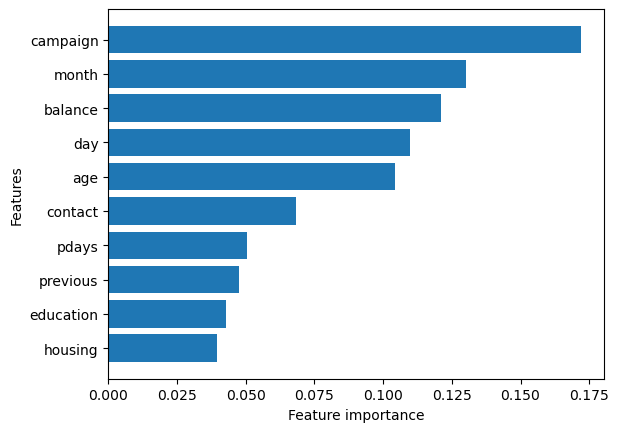

In [78]:
from sklearn.ensemble import RandomForestClassifier

def plot_features(columns, importances, n=10):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()


model = RandomForestClassifier()
model.fit(x_train, y_train)  

plot_features(x_train.columns, model.feature_importances_)
